In [1]:
import numpy as np
import pandas as pd
from sklearn import datasets 
import matplotlib.pyplot as plt

In [2]:
iris = datasets.load_iris()

In [4]:
cov_data = np.corrcoef(iris.data.T)

In [5]:
cov_data

array([[ 1.        , -0.11756978,  0.87175378,  0.81794113],
       [-0.11756978,  1.        , -0.4284401 , -0.36612593],
       [ 0.87175378, -0.4284401 ,  1.        ,  0.96286543],
       [ 0.81794113, -0.36612593,  0.96286543,  1.        ]])

In [12]:
df = pd.DataFrame(data=iris.data, columns=iris.feature_names)

df['class'] = iris.target
print(df)

     sepal length (cm)  sepal width (cm)  ...  petal width (cm)  class
0                  5.1               3.5  ...               0.2      0
1                  4.9               3.0  ...               0.2      0
2                  4.7               3.2  ...               0.2      0
3                  4.6               3.1  ...               0.2      0
4                  5.0               3.6  ...               0.2      0
..                 ...               ...  ...               ...    ...
145                6.7               3.0  ...               2.3      2
146                6.3               2.5  ...               1.9      2
147                6.5               3.0  ...               2.0      2
148                6.2               3.4  ...               2.3      2
149                5.9               3.0  ...               1.8      2

[150 rows x 5 columns]


In [13]:
x = df.drop(labels='class', axis=1).values
y = df['class'].values

In [14]:
print(x.shape, y.shape)

(150, 4) (150,)


In [15]:
class convers_pca():
    def __init__(self, no_of_components):
        self.no_of_components = no_of_components
        self.eigen_values = None
        self.eigen_vectors = None
        
    def transform(self, x):
        return np.dot(x - self.mean, self.projection_matrix.T)
    
    def inverse_transform(self, x):
        return np.dot(x, self.projection_matrix) + self.mean
    
    def fit(self, x):
        self.no_of_components = x.shape[1] if self.no_of_components is None else self.no_of_components
        self.mean = np.mean(x, axis=0)
        
        cov_matrix = np.cov(x - self.mean, rowvar=False)
        
        self.eigen_values, self.eigen_vectors = np.linalg.eig(cov_matrix)
        self.eigen_vectors = self.eigen_vectors.T
        
        self.sorted_components = np.argsort(self.eigen_values)[::-1]
        
        self.projection_matrix = self.eigen_vectors[self.sorted_components[:self.no_of_components]]

        self.explained_variance = self.eigen_values[self.sorted_components]
        self.explained_variance_ratio = self.explained_variance / self.eigen_values.sum()

In [17]:
from sklearn.preprocessing import StandardScaler

In [18]:
std = StandardScaler()
transformed = StandardScaler().fit_transform(x)

In [19]:
pca = convers_pca(no_of_components=2)
pca.fit(transformed)

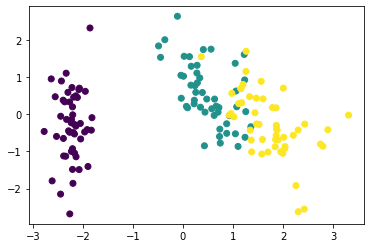

In [20]:
x_std = pca.transform(transformed)

plt.figure()
plt.scatter(x_std[:, 0], x_std[:, 1], c=y)